In [20]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re


In [3]:
resource_url = "https://companies-market-cap-copy.vercel.app/index.html"

response = requests.get(resource_url)

if response:
    # We transform the flat HTML into real HTML (structured and nested, tree-like)
    soup = BeautifulSoup(response.text, 'html')
    soup

In [5]:
years = soup.find_all("span", class_="year")



In [6]:
format_years = []
for year in years:
    format_years.append(year.text)

In [7]:
format_years

['2024',
 '2023',
 '2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009']

In [14]:

tds = soup.find_all("td")
tds

[<td><span class="year">2024</span></td>,
 <td>$97.15 B</td>,
 <td class="percentage-green">0.39%</td>,
 <td><span class="year">2023</span> </td>,
 <td>$96.77 B</td>,
 <td class="percentage-green">18.8%</td>,
 <td><span class="year">2022</span></td>,
 <td>$81.46 B</td>,
 <td class="percentage-green">51.35%</td>,
 <td><span class="year">2021</span></td>,
 <td>$53.82 B</td>,
 <td class="percentage-green">70.67%</td>,
 <td><span class="year">2020</span></td>,
 <td>$31.53 B</td>,
 <td class="percentage-green">28.31%</td>,
 <td><span class="year">2019</span></td>,
 <td>$24.57 B</td>,
 <td class="percentage-green">14.52%</td>,
 <td><span class="year">2018</span></td>,
 <td>$21.46 B</td>,
 <td class="percentage-green">82.51%</td>,
 <td><span class="year">2017</span></td>,
 <td>$11.75 B</td>,
 <td class="percentage-green">67.98%</td>,
 <td><span class="year">2016</span></td>,
 <td>$7.00 B</td>,
 <td class="percentage-green">73.01%</td>,
 <td><span class="year">2015</span></td>,
 <td>$4.04 B</t

In [10]:
values = []
for td in tds:
    if "$" in td.text:
        values.append(td.text)

In [18]:
clean_val = []
for value in values:
    clean_val.append(re.sub(r'[^0-9.]', '', value))

In [19]:
del(clean_val[-1])
del(clean_val[-1])
del(clean_val[-1])
del(clean_val[-1])
clean_val

['97.15',
 '96.77',
 '81.46',
 '53.82',
 '31.53',
 '24.57',
 '21.46',
 '11.75',
 '7.00',
 '4.04',
 '3.19',
 '2.01',
 '0.41',
 '0.20',
 '0.11',
 '0.11']

In [32]:
dict = {'value': clean_val, 'years': format_years}
df = pd.DataFrame(dict)

In [33]:
df

,value,years
0,97.15,2024
1,96.77,2023
2,81.46,2022
3,53.82,2021
4,31.53,2020
5,24.57,2019
6,21.46,2018
7,11.75,2017
8,7.00,2016
9,4.04,2015


In [25]:
conn = sqlite3.connect("tesla_revenues.db")
cursor = conn.cursor()

In [36]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS revenue (
    date TEXT,
    revenue REAL
)
""")

In [37]:
for index, row in df.iterrows():
    cursor.execute("INSERT INTO revenue (date, revenue) VALUES (?, ?)", (df["years"], df["value"]))

conn.commit()
conn.close()

ProgrammingError: Error binding parameter 1: type 'Series' is not supported

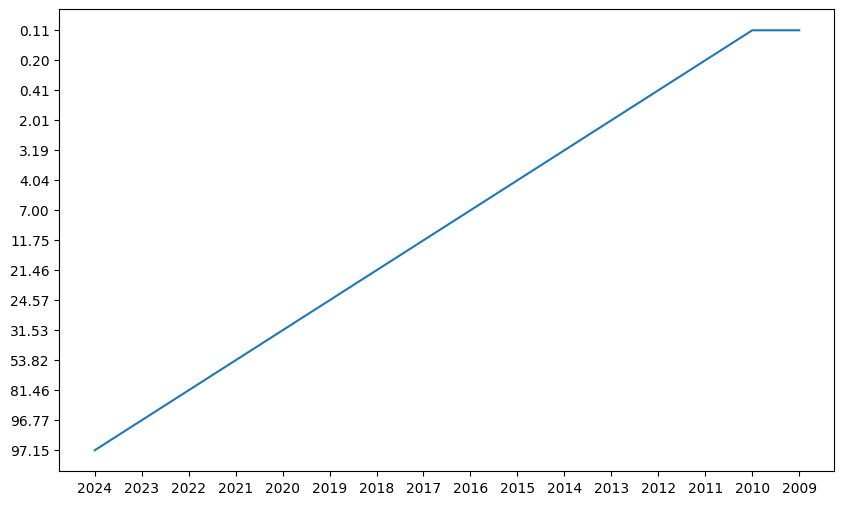

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df["years"], df["value"])